<font color="#CC3D3D"><p>
# Ensemble Learning

### Data Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read Data
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer_features = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_features

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
cancer_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

***유방암 진단 데이터***      
- 타겟 데이터: 종양이 악성(malignant, 0) or 양성(benign, 1)
- 속성 데이터: 유방암 진단 사진으로부터 측정한 종양(tumar)의 특징값(30 개)

In [3]:
# Split Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer_features, cancer.target, random_state=0)

## Similarity between models

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

In [8]:
clfs = []
LR=LogisticRegression(random_state=0); clfs.append(LR)
DT=DecisionTreeClassifier(random_state=0); clfs.append(DT)
MLP=MLPClassifier(random_state=0); clfs.append(MLP)
KNN=KNeighborsClassifier(); clfs.append(KNN)
SVM=SVC(probability=True, random_state=0); clfs.append(SVM)

LogisticRegression             0.9930817610062893
DecisionTreeClassifier         0.8939203354297695
MLPClassifier                  0.9681341719077569
KNeighborsClassifier           0.9607966457023062
SVC                            0.9842767295597485


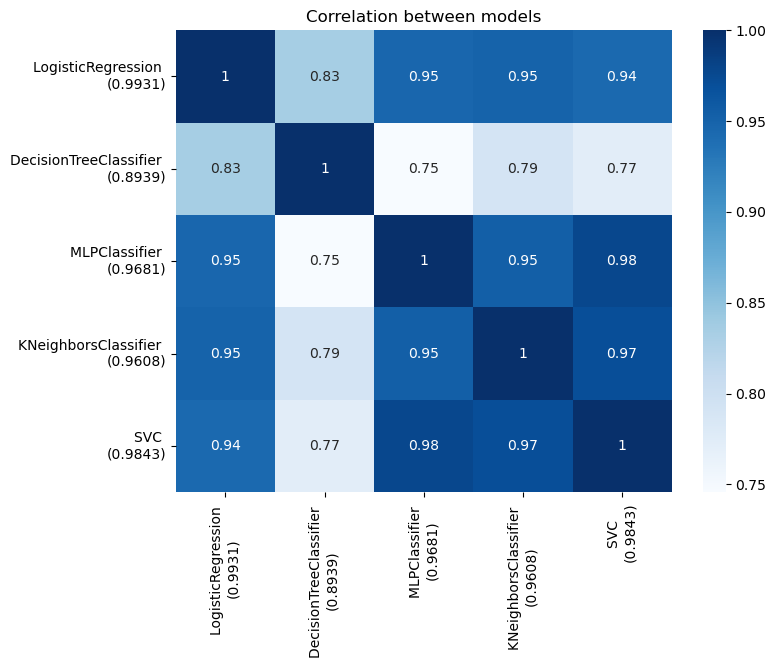

In [9]:
pred_results = []
for clf in clfs :
    pred = clf.fit(X_train, y_train).predict_proba(X_test)[:,1]
    name = type(clf).__name__
    score = roc_auc_score(y_test, pred)
    pred_results.append(pd.Series(pred, name=f'{name} \n({score:.4f})'))
    print("{:30s} {}".format(name, score))

ensemble_results = pd.concat(pred_results, axis=1)
plt.figure(figsize = (8,6))
g = sns.heatmap(ensemble_results.corr(),annot=True, cmap='Blues')
g.set_title("Correlation between models")
plt.show()
#we can choose logistic regression (because the highest scores)

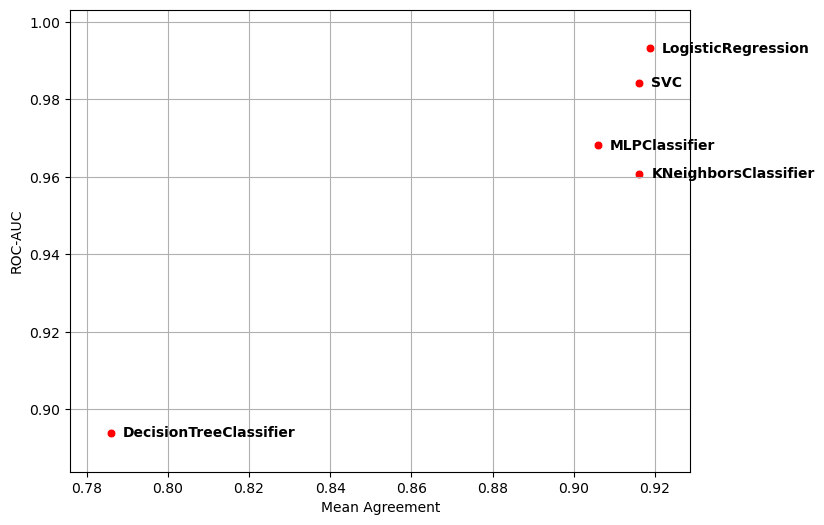

In [10]:
corr = (ensemble_results.corr().sum()-1)/(ensemble_results.corr().shape[0]-1)
names = corr.index.str[:-10]
aucs = np.array(corr.index.str[-7:-1]).astype(float)
df = pd.DataFrame({'model': names, 'auc': aucs, 'cor': corr})        

plt.figure(figsize=(8,6))
g = sns.scatterplot(x="cor", y="auc", data=df, s=40, color='red')
for line in range(0, df.shape[0]):
     g.text(df.cor[line]+0.003, df.auc[line]-0.001, 
            df.model[line], horizontalalignment='left', 
            size='medium', color='black', weight='semibold')
        
plt.xlim((df.cor.min()-0.01,df.cor.max()+0.01))
plt.ylim((df.auc.min()-0.01,df.auc.max()+0.01))
plt.xlabel('Mean Agreement')
plt.ylabel('ROC-AUC')
plt.grid()
plt.show()

## Voting ensemble   
*평가지표가 accuracy, f1-score 등일 경우 사용*

In [11]:
from sklearn.ensemble import VotingClassifier

# 위에서 평가한 모든 모델을 앙상블할 경우
voting = VotingClassifier(
    estimators = [(type(clf).__name__, clf) for clf in clfs], voting='hard')
voting.fit(X_train, y_train).score(X_test, y_test)

0.951048951048951

In [12]:
# 가장 성능이 낮은 DT를 제외하고 앙상블할 경우
voting = VotingClassifier(
    estimators = [('lr', LR), ('mlp', MLP), ('knn', KNN), ('svm', SVM)], voting='hard')
voting.fit(X_train, y_train).score(X_test, y_test)

0.9300699300699301

In [13]:
# Ridge Strategy (?)
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(
    estimators = [('lr', LR), ('mlp', MLP), ('dt', DT)], voting='hard')
voting.fit(X_train, y_train).score(X_test, y_test)

0.9440559440559441

***Plotting Decision Regions***

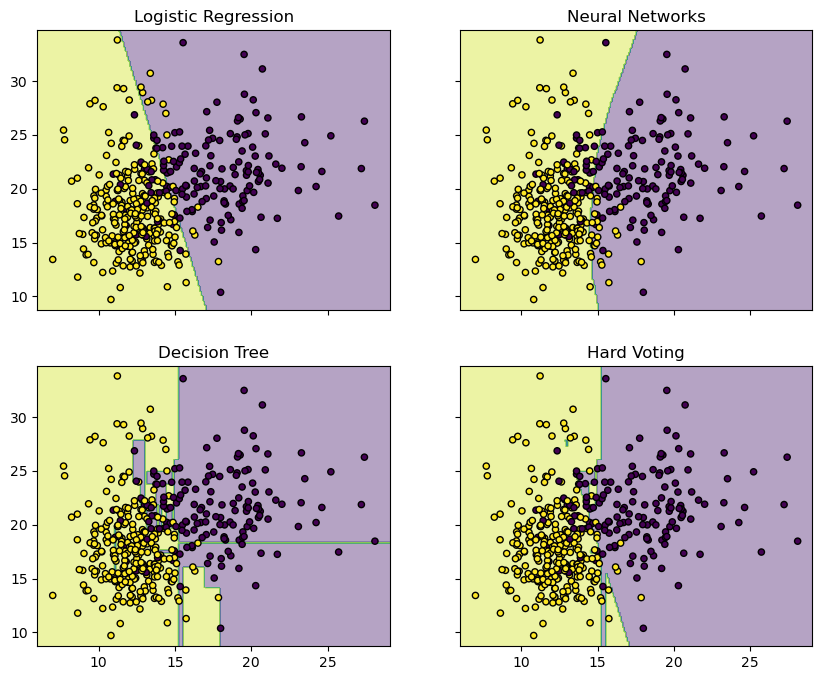

In [14]:
from itertools import product

X = X_train.values[:, [0, 1]]
y = y_train

LR.fit(X, y)
MLP.fit(X, y)
DT.fit(X, y)
voting.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))
for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [LR, MLP, DT, voting],
                        ['Logistic Regression', 'Neural Networks', 'Decision Tree', 'Hard Voting']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)
plt.show()

## Averaging predictions   
*평가지표가 roc-auc, logloss 등일 경우 사용*

***Arithmetic mean***

In [15]:
averaging = VotingClassifier(
    estimators = [('lr', LR), ('mlp', MLP), ('dt', DT)], voting='soft')
averaging.fit(X_train, y_train)

print('AUC =', roc_auc_score(y_test, averaging.predict_proba(X_test)[:,1]))

AUC = 0.9909853249475892


<img align='left' src="https://t1.daumcdn.net/cfile/tistory/2454233C57FA242D11">

***Geometric mean***

In [16]:
from scipy.stats.mstats import gmean

pred_lr = LR.fit(X_train, y_train).predict_proba(X_test)[:,1]
pred_mlp = MLP.fit(X_train, y_train).predict_proba(X_test)[:,1]
pred_dt = DT.fit(X_train, y_train).predict_proba(X_test)[:,1]

print('AUC = ', roc_auc_score(y_test, gmean([pred_lr, pred_mlp, pred_dt], axis=0)))

AUC =  0.9165618448637317


***Power mean***   
https://ko.wikipedia.org/wiki/%EB%A9%B1%ED%8F%89%EA%B7%A0

***All-in-one***

In [ ]:
from tqdm import tqdm, tqdm_notebook
from itertools import combinations

# 이 코드에서 가중평균은 빠져있다.
max_score = 0
for p in tqdm_notebook([0, 1, 2.56]):  # p==1:산술평균, p=0:기하평균, 그 외:멱평균(주의:멱평균은 과적합 가능성이 높음)    
    for i in range(2, len(clfs)+1):
        for models in combinations(clfs, i):
            if p == 0:
                pred_mean = gmean([clf.fit(X_train, y_train).predict_proba(X_test)[:,1] for clf in models], axis=0)
            else:
                preds = [clf.fit(X_train, y_train).predict_proba(X_test)[:,1] for clf in models]
                pred_mean = (np.sum(np.array(preds)**p, axis=0) / len(models))**(1/p)
            score = roc_auc_score(y_test, pred_mean)
            if max_score < score:
                best_avg_ensemble = (p, models, score)
                max_score = score

p, models, score = best_avg_ensemble
print('p = {}\nmodels = {}\nauc = {}'.format(p, '●'.join([type(clf).__name__ for clf in models]), score))

## Stacking 
<br>
<img align='left' src="https://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier_files/stackingclassification_overview.png" width=500 height=400>

Install **vecstack** package using the following command:
```
!pip install vecstack
```
https://github.com/vecxoz/vecstack#variant-a-animation    


    
    
***2-layer stacking***

In [ ]:
from vecstack import stacking

models = clfs
S_train, S_test = stacking(models,                     # list of models
                           X_train, y_train, X_test,   # data
                           regression=False,           # classification task (if you need 
                                                       #     regression - set to True)
                           needs_proba=True,           # predict class labels (if you need 
                                                       #     probabilities - set to True) 
                           n_folds=5,                  # number of folds
                           stratified=True,            # stratified split for folds
                           shuffle=True,               # shuffle the data
                           random_state=0,             # ensure reproducibility
                           verbose=2)                  # print all info

In [ ]:
X_train.shape, S_train.shape, X_test.shape, S_test.shape

In [ ]:
meta_model = LR.fit(S_train, y_train)
roc_auc_score(y_test, meta_model.predict_proba(S_test)[:,1])

***3-layer stacking***

In [ ]:
# level-1: LR, DT, MLP, KNN, SVM

models = clfs
S_train, S_test = stacking(models,                     # list of models
                           X_train, y_train, X_test,   # data
                           regression=False,           # classification task (if you need 
                                                       #     regression - set to True)
                           needs_proba=True,           # predict class labels (if you need 
                                                       #     probabilities - set to True) 
                           metric=accuracy_score,      # metric: callable
                           n_folds=3,                  # number of folds
                           stratified=True,            # stratified split for folds
                           shuffle=True,               # shuffle the data
                           random_state=0,             # ensure reproducibility
                           verbose=0)                  # print all info

In [ ]:
# level-2: LR, MLP, DT
# Level-3: Voting

averaging = VotingClassifier(estimators = [('lr', LR), ('mlp', MLP), ('dt', DT)], voting='soft')
averaging.fit(S_train, y_train)
roc_auc_score(y_test, averaging.predict_proba(S_test)[:,1])

***using `sklearn`***

In [ ]:
from sklearn.ensemble import StackingClassifier

# 2-layer stacking

estimators = [(type(clf).__name__, clf) for clf in clfs]
stk_clf = StackingClassifier(
    estimators=estimators, final_estimator=LR, cv=5)

stk_clf.fit(X_train, y_train)
roc_auc_score(y_test, stk_clf.predict_proba(X_test)[:,1])

In [ ]:
# 3-layer stacking (Level-3: Voting)

layer_one_estimators = [(type(clf).__name__, clf) for clf in clfs]
voting = VotingClassifier(estimators = [('lr', LR), ('mlp', MLP), ('dt', DT)], voting='soft')
stk_clf = StackingClassifier(estimators=layer_one_estimators, final_estimator=voting, cv=5)

stk_clf.fit(X_train, y_train)
roc_auc_score(y_test, stk_clf.predict_proba(X_test)[:,1])

In [ ]:
# 3-layer stacking (Level-3: LR)

layer_one_estimators = [(type(clf).__name__, clf) for clf in clfs]
layer_two_estimators = [('lr', LR), ('mlp', MLP), ('dt', DT)]

layer_two = StackingClassifier(estimators=layer_two_estimators, final_estimator=LR)
stk_clf = StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two, cv=5)

stk_clf.fit(X_train, y_train)
roc_auc_score(y_test, stk_clf.predict_proba(X_test)[:,1])

##### Improvements in stacked model performance can be accomplished by:   
<img align='left' src='http://drive.google.com/uc?export=view&id=1l3M-bfJHJQPK0k6EOHaDmw9HOOuMw3ZU' width=350, height=300>  
<img align='left' src='http://drive.google.com/uc?export=view&id=1rFFHDeMBeslxTRZbHBmdizrms_tMgwSh' width=350, height=300><br>

### Model Stacking in Kaggle: 
- [1st Place Solution of "Home Depot Product Search Relevance"](https://github.com/ChenglongChen/Kaggle_HomeDepot)
<img src="https://github.com/ChenglongChen/Kaggle_HomeDepot/raw/master/Fig/FlowChart.jpg" width=800, height=600><p>
- [1st Place Solution of "Otto Group Product Classification Challenge"](https://www.kaggle.com/c/otto-group-product-classification-challenge/discussion/14335)
<br>
<img src="http://drive.google.com/uc?export=view&id=1SfVsQSX7Rjmu335zX1aFdolBKccv545w" width=600, height=400>
<br><br>
- [1st Place Solution of "Homesite Quote Conversion"](https://kweonwooj.tistory.com/2)
<br>
<img src="https://t1.daumcdn.net/cfile/tistory/2132EF50571DDC1F26" width=700, height=500>
<br><br>

<font color="#CC3D3D"><p>
# End